# distgen Generator - particle generation

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from distgen import Generator
from distgen.drivers import run_distgen

In [3]:
from astra import template_dir
import os

In [4]:
# Set some parameters

DISTGEN_PARAMS = {
'beam': {'params': {'MTE': {'units': 'meV', 'value': 150},
                     'total_charge': {'units': 'pC', 'value': 100}},
          'particle_count': 12345,
          'rand_type': 'hammersley',
          'start_type': 'cathode'},
 'output': {'file': 'astra_particles.dat', 'type': 'astra'},
 'r_dist': {'params': {'fraction': {'units': 'dimensionless', 'value': 0.5},
                       'pinhole_size': {'units': 'mm', 'value': 1}},
            'type': 'rtg'},
 't_dist': {'params': {'avg_t': {'units': 'ps', 'value': 0},
                       'sigma_t': {'units': 'ps', 'value': 8.5}},
            'type': 'gaussian'}
}

In [5]:
G = Generator(params=DISTGEN_PARAMS, verbose=True)
BEAM = G.beam()

Distribution format: astra
Output file: astra_particles.dat

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 100.000 pC.
   Number of macroparticles: 12345.
   r distribution:       Assuming cylindrical symmetry...
   t distribution: Gaussian
      avg_t = 0.000 ps, sigma_t = 8.500 ps
   px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 276.857 eV/c
   Scaling sigma_x -> 0.235 mm
   Scaling sigma_y -> 0.235 mm
   Scaling sigma_px -> 276.857 eV/c
   Scaling sigma_py -> 276.857 eV/c
   Scaling sigma_pz -> 276.857 eV/c
   Scaling sigma_t -> 8.500 ps
   Cathode start: fixing pz momenta to forward hemisphere
      avg_pz -> 220.973 eV/c, sigma_pz -> 166.795 eV/c
...done. Time Ellapsed: 48.90 millisecond.



/Users/chrisonian/Code/miniconda3/envs/devel/lib/python3.7/site-packages/pint/quantity.py:221: BehaviorChangeWarning: The way Pint handles NumPy operations has changed with the
implementation of NEP 18. Unimplemented NumPy operations will now fail instead of making
assumptions about units. Some functions, eg concat, will now return Quanties with units, where
they returned ndarrays previously. See https://github.com/hgrecco/pint/pull/905.

To hide this warning, wrap your first creation of an array Quantity with
warnings.catch_warnings(), like the following:

import numpy as np
import warnings
from pint import Quantity

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Quantity([])

To disable the new behavior, see
https://www.numpy.org/neps/nep-0018-array-function-protocol.html#implementation

  warnings.warn(array_function_change_msg, BehaviorChangeWarning)


In [6]:
keys = list(BEAM.params)
keys

['x', 'y', 'z', 'px', 'py', 'pz', 't', 'w']

In [7]:
for k in keys:
    print(k, BEAM.std(k))

x 0.0002352379223490984 meter
y 0.00023523792234909842 meter
z 0.0 meter
px 276.8570773893552 electron_volt / speed_of_light
py 276.8570773893552 electron_volt / speed_of_light
pz 166.79538484288747 electron_volt / speed_of_light
t 8.5 picosecond
w 1.3552527156068805e-20 dimensionless


In [8]:
for k in keys:
    print(k, BEAM.avg(k))

x 2.0328790734103208e-20 meter
y 0.0 meter
z 0.0 meter
px 3.4416913763379853e-15 electron_volt / speed_of_light
py 4.191091917959966e-15 electron_volt / speed_of_light
pz 220.9731678183768 electron_volt / speed_of_light
t 1.5612511283791264e-16 picosecond
w 8.10044552450385e-05 dimensionless


# Plot

In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13,8)
%config InlineBackend.figure_format = 'retina'
#%matplotlib inline

(array([[0.00000000e+00, 0.00000000e+00, 8.10044552e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 8.10044552e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([-33055.07839927, -32417.26785217, -31779.45730507, -31141.64675798,
        -30503.83621088, -29866.02566378, -29228.21511669, -28590.40456959,
        -27952.59402249, -27314.78347539, -26676.9729283 , -26039.1623812 ,
        -25401.3518341 , -24763.54128

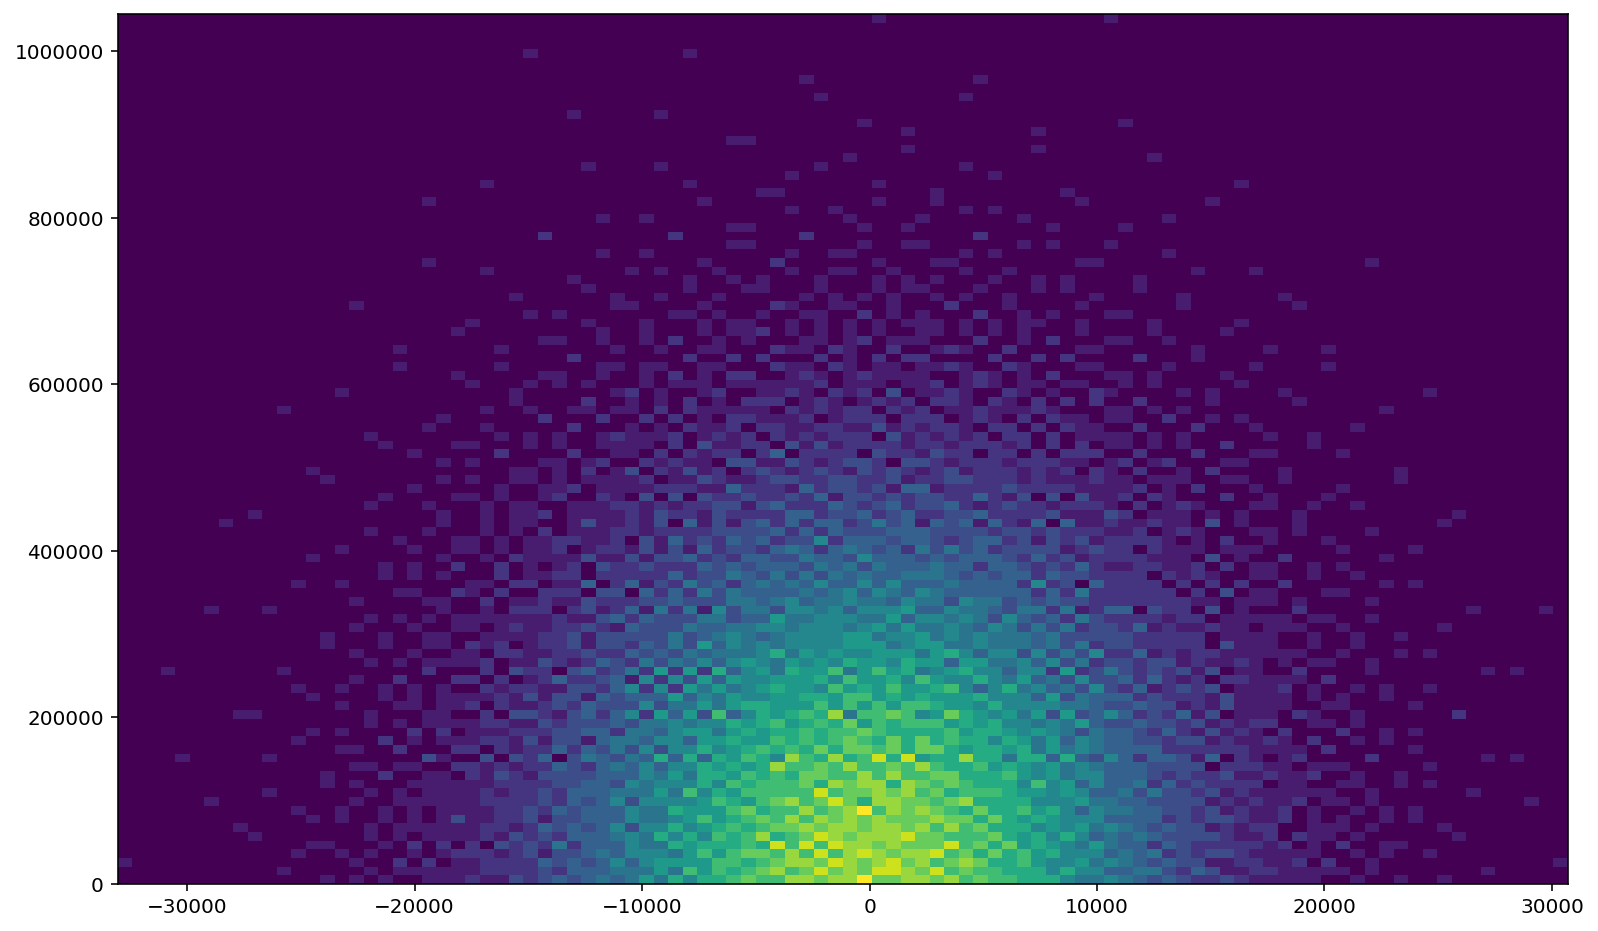

In [10]:
plt.hist2d(1000*BEAM['t'].magnitude, 1000*BEAM['pz'].magnitude, weights=BEAM['w'].magnitude, bins=100)